In [3]:
from datetime import datetime

import statistics as stat
import pandas as pd
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt
import numpy as np

In [60]:
def pairsTradeModel(sOne, sTwo, cash, buyaggro, sellaggro, zscore, startday):
    ratio = sOne/sTwo
    value = []
    opt1 = []
    opt2 = []
    sOneHold = 0
    sTwoHold = 0
    mu = stat.mean(ratio[0:startday-1])
    sigma = stat.stdev(ratio[0:startday-1])
    for i in range(len(sOne)):
        x = ratio[i]       
        if i > startday:
            # Changed the mean/st.dev algorithms to ones that only involved n calculations. Previously we performed
            # at least n^2 calculations, hence why it took forever...
            muold = mu
            mu = mu + ((ratio[i]-mu)/i)
            sigma = ((i-1-1)/(i-1))*(sigma**2)+(1/(i-1))*(ratio[i]-mu)*(ratio[i]-muold)
            # see https://stats.stackexchange.com/questions/24878/computation-of-new-standard-deviation-using-old-standard-deviation-after-change
            if x > mu + (sigma*zscore):
                cash = cash + (round(sOneHold*sellaggro)* sOne[i])
                sOneHold -= round(sOneHold*sellaggro)
                sTwoHold += round((cash*buyaggro)/sTwo[i])
                cash = cash - ((round((cash*buyaggro)/sTwo[i]))* sTwo[i])
            
            if x < mu - (sigma*zscore):
                cash = cash + round(sTwoHold*sellaggro)* sTwo[i]
                sTwoHold -= round(sTwoHold*sellaggro)
                sOneHold += round((cash*buyaggro)/sOne[i])
                cash = cash - ((round((cash*buyaggro)/sOne[i]))* sOne[i])
                               
        portfolioVal = cash + (sTwoHold * sTwo[i]) + (sOneHold * sOne[i])
        value.append(portfolioVal)
        
        if i > startday:
            opt1.append((portfolioVal/value[startday])*100)
            opt2.append((sOne[i]/sOne[startday])*100)
        #ratio.append(x)
        
    #print(coint(sOne, sTwo, autolag = 'aic'))
    
        
    buy = []
    sell = []
    
    end = ratio[(len(ratio)-1)]
    
    if end > mu+(sigma*zscore):
        sell.append("Sell " + str(sellaggro) + " Nomination")
        buy.append("Buy " + str(buyaggro) + " Presidential")
        
    if end < mu - (sigma*zscore):
        sell.append("Sell " + str(sellaggro) + " Presidential")
        buy.append("Buy " + str(buyaggro) + " Nomination")
        
    
    cash = cash + (sOneHold * sOne[len(sOne)-1]) + (sTwoHold * sTwo[len(sTwo)-1])
    print('Pairs Return:' + str(cash/10000))
    print("Regular Return:" + str(sOne[len(sOne)-1]/sOne[90]))
        
    plt.plot(opt1, color='green')
    plt.plot(opt2, color='red')
    plt.show()
    print(buy, sell)
    return

In [61]:

def pairsTradeModel2(sOne, sTwo, cash, buyaggro, sellaggro, zscore, startday):
    ratio = sOne/sTwo
    value = []
    opt1 = []
    opt2 = []
    sOneHold = 0
    sTwoHold = 0
    reserveAcct = 0
    sOnePur = 0
    sTwoPur = 0
    mu = stat.mean(ratio[0:startday-1])
    sigma = stat.stdev(ratio[0:startday-1])
    
    for i in range(len(sOne)):
        if cash > 850:
            reserveAcct += cash - 850
            cash -= cash - 850
        x = ratio[i]       
        if i > startday:
            # Changed the mean/st.dev algorithms to ones that only involved n calculations. Previously we performed
             # at least n^2 calculations, hence why it took forever...
            muold = mu
            mu = mu + ((ratio[i]-mu)/i)
            sigma = ((i-1-1)/(i-1))*(sigma**2)+(1/(i-1))*(ratio[i]-mu)*(ratio[i]-muold)
            # see https://stats.stackexchange.com/questions/24878/computation-of-new-standard-deviation-using-old-standard-deviation-after-change
            if x > mu + (sigma*zscore):
                cash = cash + (round(sOneHold*sellaggro)* sOne[i])
#                print("Sell " + str(sellaggro) + " Nomination")
                sOneHold -= round(sOneHold*sellaggro)
#                print("Buy " + str(buyaggro) + " Presidential")
                try:
                    sOnePur -= round(sOneHold*sellaggro) * (sOnePur/sOneHold)
                except:
                    0
                
                if sTwoPur < 850:
                    sTwoHold += round((cash*buyaggro)/sTwo[i])
                    cash = cash - ((round((cash*buyaggro)/sTwo[i]))* sTwo[i])
                    sTwoPur += (round((cash*buyaggro)/sTwo[i]))* sTwo[i]
                    
            
            if x < mu - (sigma*zscore):
                cash = cash + round(sTwoHold*sellaggro)* sTwo[i]
#                print("Sell " + str(sellaggro) + " Presidential")
                sTwoHold -= round(sTwoHold*sellaggro)
#                print("Buy " + str(buyaggro) + " Nomination")
                try:
                    sTwoPur -= round(sTwoHold*sellaggro) * (sTwoPur/sTwoHold)
                except:
                    0
                if sOnePur < 850:
                    sOneHold += round((cash*buyaggro)/sOne[i])
                    cash = cash - ((round((cash*buyaggro)/sOne[i]))* sOne[i])
                    sOnePur += (round((cash*buyaggro)/sOne[i]))* sOne[i]
                               
        portfolioVal = cash + (sTwoHold * sTwo[i]) + (sOneHold * sOne[i]) + reserveAcct
        value.append(portfolioVal)
        
        if i > startday:
            opt1.append((portfolioVal/value[startday])*100)
            opt2.append((sOne[i]/sOne[startday])*100)
        #ratio.append(x)
    
    
    buy = []
    sell = []
    
    end = ratio[1258]
    
    if end > mu+(sigma*zscore):
        sell.append("Sell " + str(sellaggro) + " Nomination")
        buy.append("Buy " + str(buyaggro) + " Presidential")
        
    if end < mu - (sigma*zscore):
        sell.append("Sell " + str(sellaggro) + " Presidential")
        buy.append("Buy " + str(buyaggro) + " Nomination")
    
    #print(coint(sOne, sTwo, autolag = 'aic'))
    
    cash = cash + (sOneHold * sOne[len(sOne)-1]) + (sTwoHold * sTwo[len(sTwo)-1])
    print('Pairs Return:' + str(cash/10000))
    print("Regular Return:" + str(sOne[len(sOne)-1]/sOne[90]))
        
    plt.plot(opt1, color='green')
    plt.plot(opt2, color='red')
    plt.show()
    print(reserveAcct)
    print(sell, buy)
    return


In [62]:
def main():
    df = pd.read_csv('stock.csv')   
    #df = np.genfromtxt('stock.csv', dtype=float, delimiter=",",skip_header=1)
    #VOO = df[:,1]
    #SPY = df[:,2]
    numpy_df = np.asarray(df)
    #print(numpy_df)
    VOO = numpy_df[:,1]
    #VOO.astype(int)
    SPY = numpy_df[:,2]
    #SPY.astype(int)
    #VOO = df['VOO']
    #SPY = df['SPY']
    
    pairsTradeModel(VOO, SPY, 10000, 0.30, 0.30, 0.53, 140)
    return

Pairs Return:1.426534923
Regular Return:1.4496874462685876


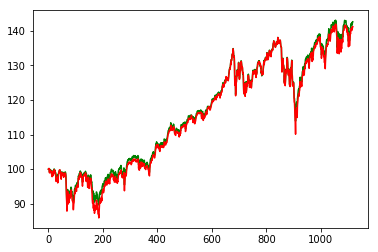

['Buy 0.3 Presidential'] ['Sell 0.3 Nomination']
Executed in: 0:00:00.113467


In [63]:
if __name__ == "__main__":
    startTime = datetime.now()
    main()
    print("Executed in:", datetime.now() - startTime)

In [48]:
data = pd.read_csv('stock.csv')
data['SPY']

0       196.429993
1       196.160004
2       198.410004
3       198.110001
4       199.380005
5       201.660004
6       201.770004
7       201.070007
8       202.339996
9       203.149994
10      203.339996
11      203.979996
12      204.179993
13      203.960007
14      204.190002
15      204.240005
16      204.369995
17      205.550003
18      205.220001
19      205.580002
20      206.679993
21      207.259995
22      207.110001
23      207.639999
24      207.199997
25      205.759995
26      207.089996
27      207.889999
28      207.660004
29      208.000000
           ...    
1229    301.089996
1230    300.160004
1231    300.920013
1232    301.100006
1233    301.079987
1234    298.279999
1235    298.209991
1236    295.869995
1237    297.619995
1238    297.000000
1239    295.399994
1240    296.769989
1241    293.239990
1242    288.059998
1243    290.420013
1244    294.350006
1245    293.079987
1246    288.529999
1247    291.269989
1248    293.239990
1249    296.279999
1250    295.